In [3]:
import yaml
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from data.trf.trf_dataset import TRFDataset
from hcnn.model import load_checkpoint
from hcnn.utils import visualize_feature_embeddings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
model = load_checkpoint('./best_model.pth', './config.yaml')

with open('./config.yaml') as file:
    config = yaml.safe_load(file)
dataset = TRFDataset(
    root_dir="../../data/trf/1/thaat",
    labels=config['dataset']['labels'],
    sample_rate=model.front_end.config.sample_rate,
)

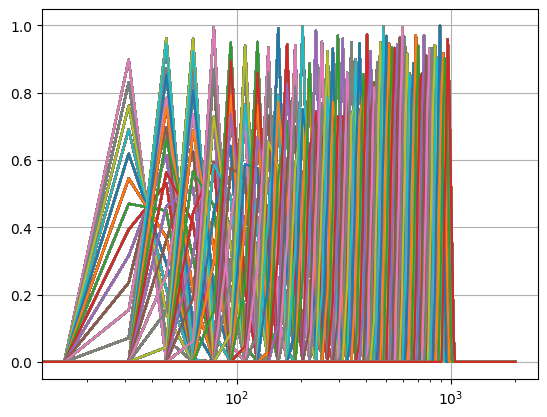

In [7]:
fe_filterbank = model.front_end.build_filterbank().detach().numpy()
fft_bins = model.front_end.fft_bins.detach().numpy()

fig, ax = plt.subplots(1, 1)
for filter_idx in range(fe_filterbank.shape[1]):
    ax.plot(fft_bins, fe_filterbank, label=f'Filter{filter_idx:03d}')
ax.set_xscale('log')
ax.grid(True)
plt.show()

In [45]:
N_examples = 128
idcs = np.random.choice(np.arange(len(dataset)), size=N_examples, replace=True)
F, L = [], []
for i in tqdm(idcs):
    x, label = dataset[i]
    features = model.front_end(x).detach()
    F.append(features[None, ...])
    L.append(label)
F = torch.cat(F, dim=0)
L = torch.tensor(L)
print(F.shape, L.shape)

100%|██████████| 128/128 [01:17<00:00,  1.66it/s]


torch.Size([128, 118, 3751]) torch.Size([128])


(119936, 2)


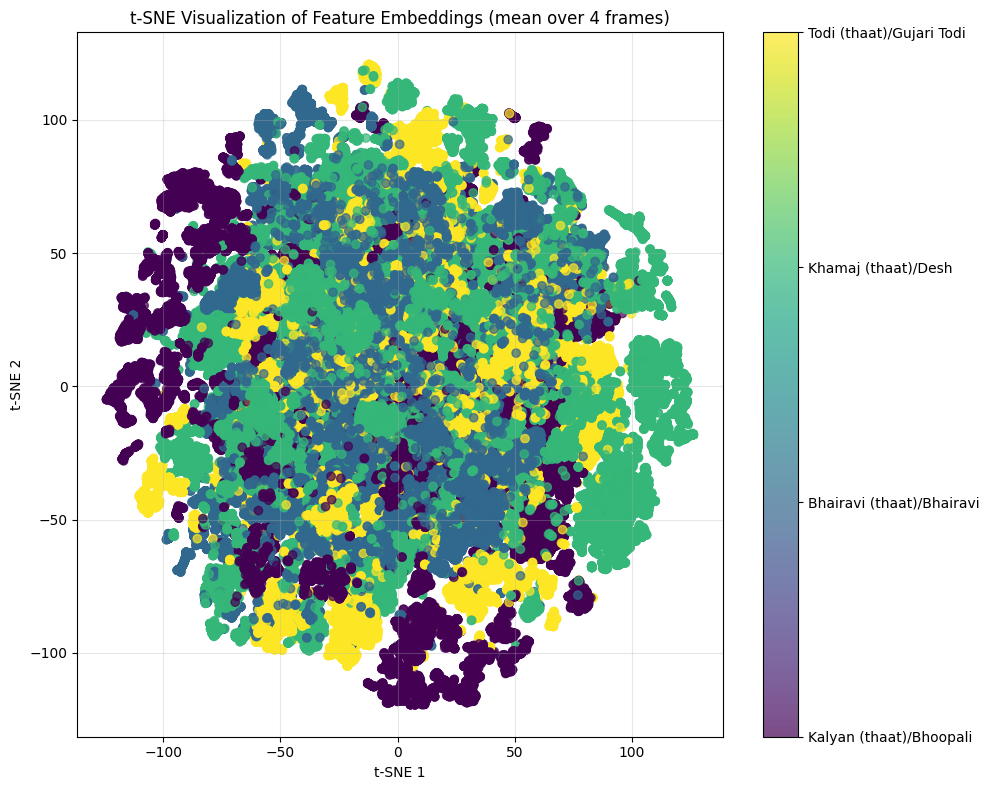

In [48]:
visualize_feature_embeddings(F, L, dataset.get_label_names(), method='TSNE', n_components=2, window_size=4, mode='mean')

In [56]:
torch.nn.functional.softmax(model(dataset[0][0][None,...]), dim=-1), dataset[0][1]

(tensor([[0.0758, 0.1075, 0.6797, 0.1370]], grad_fn=<SoftmaxBackward0>), 0)